In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 觀察並整理資料

In [13]:
from tensorflow.keras.datasets import fashion_mnist

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
#查看種類有幾種
len(np.unique(y_train))

10

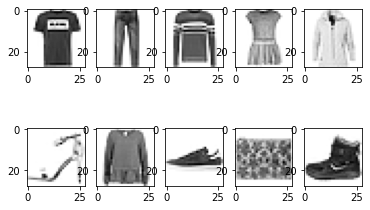

In [19]:
for i in range(len(np.unique(y_train))):
    L = x_train[y_train == i]
    plt.subplot(2, 5, i+1)
    plt.imshow(L[0], cmap="Greys")

In [20]:
#由上圖知道y_train所代表的意義
# class_names = ['短袖圓領T恤', '褲子', '套衫', '連衣裙', '外套', '涼鞋', '襯衫', '運動鞋','包', '短靴']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
len(x_train), len(x_test)

(60000, 10000)

In [24]:
def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x-mean) /std

In [25]:
# 將資料標準化
x_train, x_test = normalize(x_train), normalize(x_test)

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## 2.打造神經網路

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Nadam

In [28]:
model = Sequential()

### Conv16 - BN - MP - Conv32 - BN - MP - Conv64 - BN - MP - FC(增加Dropout)
做BN層的目的是為了不讓值的大小影響影響梯度的變化，使error surface看起來比較接近正圓形，training比較好做
增加Dropout避免過擬合

In [29]:
model.add(Conv2D(16, (3, 3), padding = 'same', input_shape = (28, 28 ,1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(), metrics = ['accuracy'])

### 3. 訓練和結果

In [33]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 12, validation_data = (x_test, y_test))

Epoch 1/12
600/600 [==============================] - 13s 22ms/step - loss: 0.4555 - accuracy: 0.8364 - val_loss: 0.3442 - val_accuracy: 0.8733
Epoch 2/12
600/600 [==============================] - 12s 21ms/step - loss: 0.2882 - accuracy: 0.8941 - val_loss: 0.2831 - val_accuracy: 0.8951
Epoch 3/12
600/600 [==============================] - 12s 20ms/step - loss: 0.2473 - accuracy: 0.9088 - val_loss: 0.2750 - val_accuracy: 0.8977
Epoch 4/12
600/600 [==============================] - 12s 20ms/step - loss: 0.2181 - accuracy: 0.9187 - val_loss: 0.2564 - val_accuracy: 0.9094
Epoch 5/12
600/600 [==============================] - 12s 21ms/step - loss: 0.1972 - accuracy: 0.9265 - val_loss: 0.2585 - val_accuracy: 0.9077
Epoch 6/12
600/600 [==============================] - 12s 20ms/step - loss: 0.1772 - accuracy: 0.9345 - val_loss: 0.2631 - val_accuracy: 0.9063
Epoch 7/12
600/600 [==============================] - 12s 20ms/step - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.2603 - val_accuracy:

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2738 - accuracy: 0.9174


(0.5, 1.0)

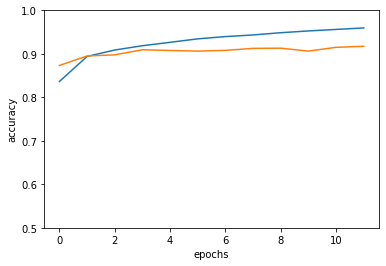

In [35]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.5, 1)

(0.0, 1.0)

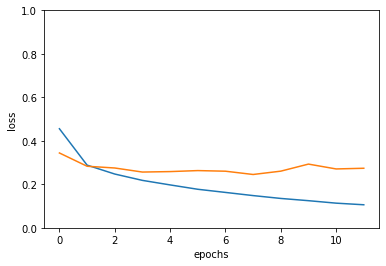

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([0, 1])

In [22]:
from ipywidgets import interact_manual

In [39]:
result = model.predict_classes(x_test)

In [38]:
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [24]:
def show(n):
    plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys')
    plt.title(class_names[np.where(y_test == [1])[0][0]])
    print("prediction：", class_names[result[n]])

In [25]:
interact_manual(show,  n = (0, 10000))

interactive(children=(IntSlider(value=5000, description='n', max=10000), Button(description='Run Interact', st…

<function __main__.show(n)>

### 改動的部分
1. 將資料標準化
2. 加入BN層和Dropout
3. loss function 改成 categorical_crossentropy 
4. optimizer function 改成 Nadam